In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/unemployment-dataset/unemployment analysis.csv


# Loading data

In [3]:
df = pd.read_csv('/kaggle/input/unemployment-dataset/unemployment analysis.csv')

In [4]:
df.columns

Index(['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [5]:
df = df.drop('Country Code', axis = 1)

In [6]:
df['Country Name'].nunique(), df['Country Name'].unique()

(235,
 array(['Africa Eastern and Southern', 'Afghanistan',
        'Africa Western and Central', 'Angola', 'Albania', 'Arab World',
        'United Arab Emirates', 'Argentina', 'Armenia', 'Australia',
        'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin',
        'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain',
        'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus', 'Belize',
        'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
        'Botswana', 'Central African Republic', 'Canada',
        'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
        'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
        'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
        'Caribbean small states', 'Cuba', 'Cyprus', 'Czech Republic',
        'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria',
        'East Asia & Pacific (excluding high income)',
        'Early-demographic dividend', 'East Asi

In [7]:
df = df.set_index('Country Name')
df = df.T
df.head(10)

Country Name,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Australia,...,"Venezuela, RB",Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1991,7.80,10.65,4.42,4.21,10.31,11.62,1.87,5.44,1.60,9.58,...,9.45,12.35,2.09,1.68,4.80,2.10,8.32,29.95,18.90,4.94
1992,7.84,10.82,4.53,4.21,30.01,12.12,1.84,6.36,1.80,10.73,...,7.69,12.51,1.91,1.69,4.96,2.38,8.31,29.98,19.37,4.99
1993,7.85,10.72,4.55,4.23,25.26,12.86,1.85,10.10,5.30,10.87,...,6.60,12.70,1.97,1.73,5.23,2.63,8.35,29.92,19.70,4.97
1994,7.84,10.73,4.54,4.16,20.84,12.95,1.81,11.76,6.60,9.72,...,8.56,12.47,1.93,1.59,5.49,3.04,8.34,29.89,18.43,4.96
1995,7.83,11.18,4.53,4.11,14.61,13.32,1.80,18.80,6.70,8.47,...,10.24,12.13,1.90,1.74,5.63,3.19,8.96,29.89,16.81,5.63
1996,7.84,10.96,4.57,4.10,13.93,12.38,1.90,17.11,9.30,8.51,...,11.77,12.21,1.93,1.72,5.70,3.47,9.59,29.87,15.30,6.25
1997,7.86,10.78,4.60,4.09,16.88,11.95,1.98,14.82,10.80,8.36,...,11.16,12.12,2.87,1.68,5.70,3.90,10.20,29.91,13.64,6.93
1998,7.81,10.80,4.66,4.07,20.05,11.97,2.14,12.65,9.40,7.68,...,11.15,11.86,2.29,1.76,5.86,4.18,10.81,29.95,12.00,6.46
1999,7.79,10.81,4.86,4.05,20.84,12.11,2.22,14.05,11.20,6.87,...,14.53,11.50,2.33,1.78,5.97,4.48,11.46,29.91,12.44,6.00
2000,7.72,10.81,4.92,4.03,19.03,12.60,2.25,15.00,11.05,6.28,...,13.99,11.11,2.26,1.69,5.77,4.66,11.56,29.88,12.93,5.69


For clarity, we will create subdatasets from the original datasets for ease of analysis later. 

In [8]:
groups = ['Africa Eastern and Southern', 
        'Africa Western and Central', 'Arab World',
        'Central Europe and the Baltics', 
        'Caribbean small states',
        'East Asia & Pacific (excluding high income)',
        'Early-demographic dividend', 'East Asia & Pacific',
        'Europe & Central Asia (excluding high income)',
        'Europe & Central Asia', 
        'Euro area',
        'European Union', 'Fragile and conflict affected situations',
        'High income',
        'Heavily indebted poor countries (HIPC)', 
        'IBRD only', 'IDA & IBRD total', 'IDA total',
        'IDA blend', 'IDA only', 
        'Latin America & Caribbean (excluding high income)', 
        'Latin America & Caribbean',
        'Least developed countries: UN classification', 'Low income',
         'Lower middle income', 'Low & middle income',
         'Late-demographic dividend',  'Middle East & North Africa', 
        'Middle income', 
        'Middle East & North Africa (excluding high income)', 
        'OECD members', 'Other small states',
        'Pre-demographic dividend', 'Pacific island small states',
        'Post-demographic dividend',
        'Sub-Saharan Africa (excluding high income)', 
        'Sub-Saharan Africa', 'Small states',
        'East Asia & Pacific (IDA & IBRD countries)',
        'Europe & Central Asia (IDA & IBRD countries)', 
        'Latin America & the Caribbean (IDA & IBRD countries)',
         'Middle East & North Africa (IDA & IBRD countries)',
        'South Asia (IDA & IBRD)',
        'Sub-Saharan Africa (IDA & IBRD countries)',
        'Upper middle income', 'World']

#This list contains 189 countries
df_c = df.drop(groups, axis = 1)

In [9]:
#Purely based on geography (no differentiation of low/high income status)
sgroup = ['Africa Eastern and Southern', 
        'Africa Western and Central', 
        'Central Europe and the Baltics', 
        'Latin America & Caribbean',
        'Caribbean small states',
        'North America',
        'Sub-Saharan Africa','European Union',
        'Europe & Central Asia',
        'East Asia & Pacific',
        'Sub-Saharan Africa',
        'Middle East & North Africa']
df_g = df[sgroup]

# Overview of trends for selected countries and regions

<Figure size 1200x400 with 0 Axes>

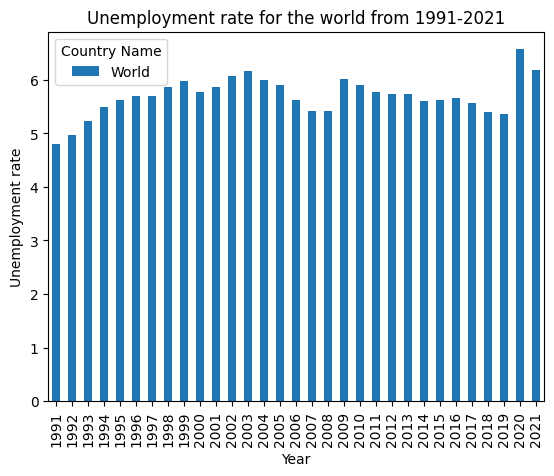

In [10]:
plt.figure(figsize = (12,4));
df[['World']].plot(kind = 'bar');
plt.xlabel('Year');
plt.xticks(rotation='vertical')
plt.ylabel('Unemployment rate');
plt.title('Unemployment rate for the world from 1991-2021');
#plt.legend(loc = 'upper right');

There are 3 notable peaks in the world's unemployment rate:
- 1. Year 1999: Possibly correlates with the 1997 East Asian financial crisis
- 2. Year 2009: Probably correlates with the 2007-2008 global financial crisis
- 3. Year 2020: Highly likely correlates with the 2020 global pandemic

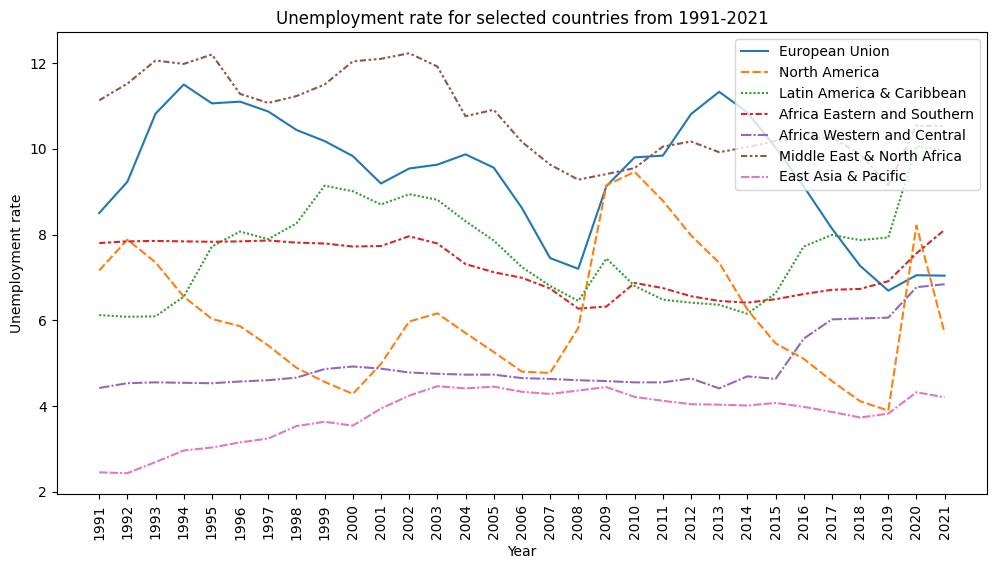

In [11]:
plt.figure(figsize = (12,6));
sns.lineplot(df[['European Union', 'North America','Latin America & Caribbean', 'Africa Eastern and Southern',
                      'Africa Western and Central',  'Middle East & North Africa','East Asia & Pacific']])
plt.xlabel('Year');
plt.xticks(rotation='vertical')
plt.ylabel('Unemployment rate');
plt.title('Unemployment rate for selected countries from 1991-2021');
plt.legend(loc = 'upper right');

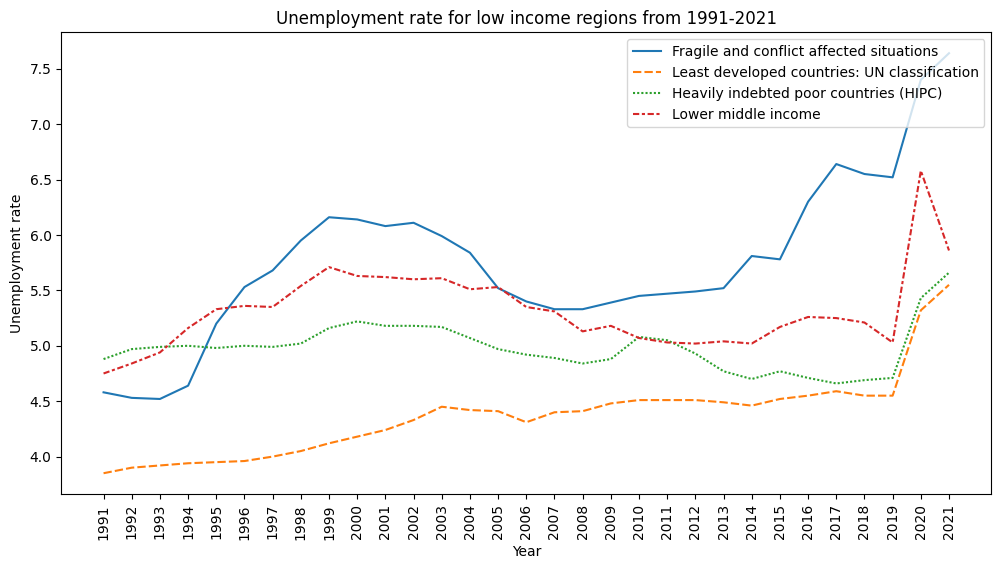

In [12]:
plt.figure(figsize = (12,6));
sns.lineplot(df[['Fragile and conflict affected situations',
                 'Least developed countries: UN classification',
                'Heavily indebted poor countries (HIPC)',
                'Lower middle income']])
plt.xlabel('Year');
plt.xticks(rotation='vertical')
plt.ylabel('Unemployment rate');
plt.title('Unemployment rate for low income regions from 1991-2021');
plt.legend(loc = 'upper right');

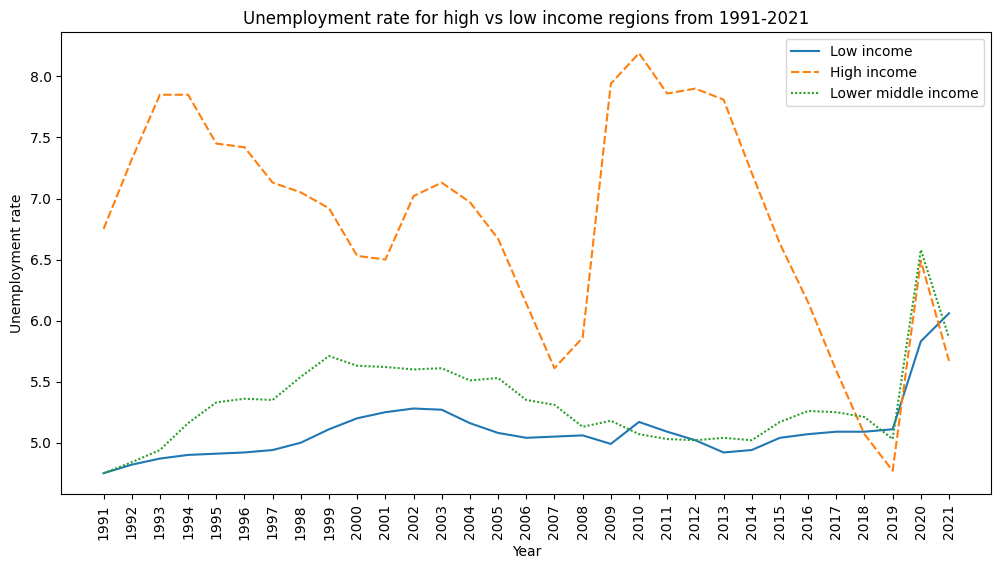

In [13]:
plt.figure(figsize = (12,6));
sns.lineplot(df[['Low income',
                'High income',
                'Lower middle income']])
plt.xlabel('Year');
plt.xticks(rotation='vertical')
plt.ylabel('Unemployment rate');
plt.title('Unemployment rate for high vs low income regions from 1991-2021');
plt.legend(loc = 'upper right');

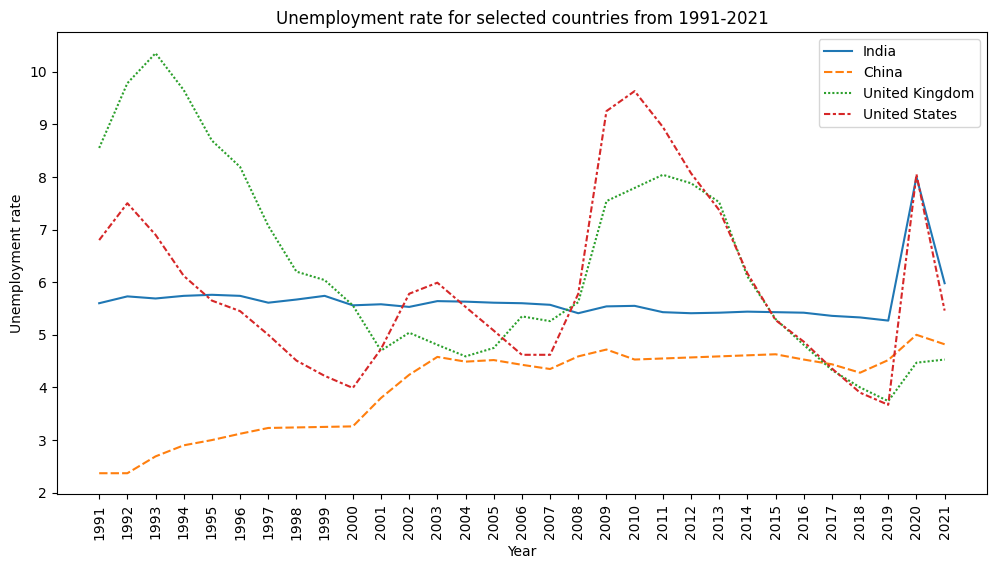

In [14]:
plt.figure(figsize = (12,6));
sns.lineplot(data=df[['India', 'China', 'United Kingdom', 'United States']])
plt.xlabel('Year');
plt.xticks(rotation='vertical')
plt.ylabel('Unemployment rate');
plt.title('Unemployment rate for selected countries from 1991-2021');
plt.legend(loc = 'upper right');

# 2009: Aftermath of the 2007-2008 Global Financial Crisis

In [15]:
df_09  = df_c.loc['2009']
dfg_09 = df_g.loc['2009']
dfg_09.sort_values(ascending = False)

Country Name
Caribbean small states            10.11
Middle East & North Africa         9.41
North America                      9.15
European Union                     9.13
Europe & Central Asia              8.93
Central Europe and the Baltics     8.49
Latin America & Caribbean          7.44
Africa Eastern and Southern        6.32
Sub-Saharan Africa                 5.67
Sub-Saharan Africa                 5.67
Africa Western and Central         4.58
East Asia & Pacific                4.44
Name: 2009, dtype: float64

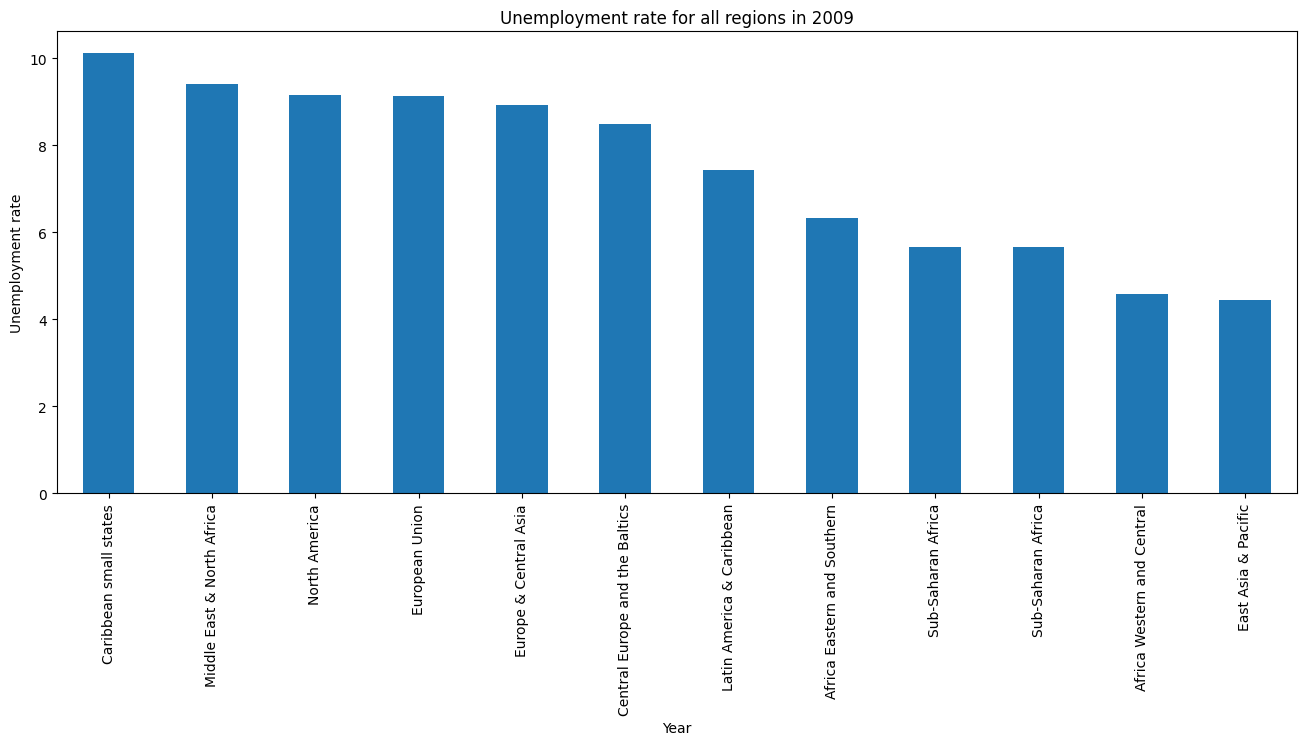

In [16]:
plt.figure(figsize = (16,6));
dfg_09.sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Year');
plt.xticks(rotation='vertical')
plt.ylabel('Unemployment rate');
plt.title('Unemployment rate for all regions in 2009');
#plt.legend(loc = 'upper right');

# 2020: Global Pandemic

In [17]:
df_20  = df_c.loc['2020']
dfg_20 = df_g.loc['2020']
dfg_20.sort_values(ascending = False)

Country Name
Middle East & North Africa        10.54
Latin America & Caribbean         10.06
Caribbean small states             9.83
North America                      8.21
Africa Eastern and Southern        7.56
Sub-Saharan Africa                 7.28
Sub-Saharan Africa                 7.28
Europe & Central Asia              7.18
European Union                     7.05
Africa Western and Central         6.77
Central Europe and the Baltics     4.37
East Asia & Pacific                4.32
Name: 2020, dtype: float64

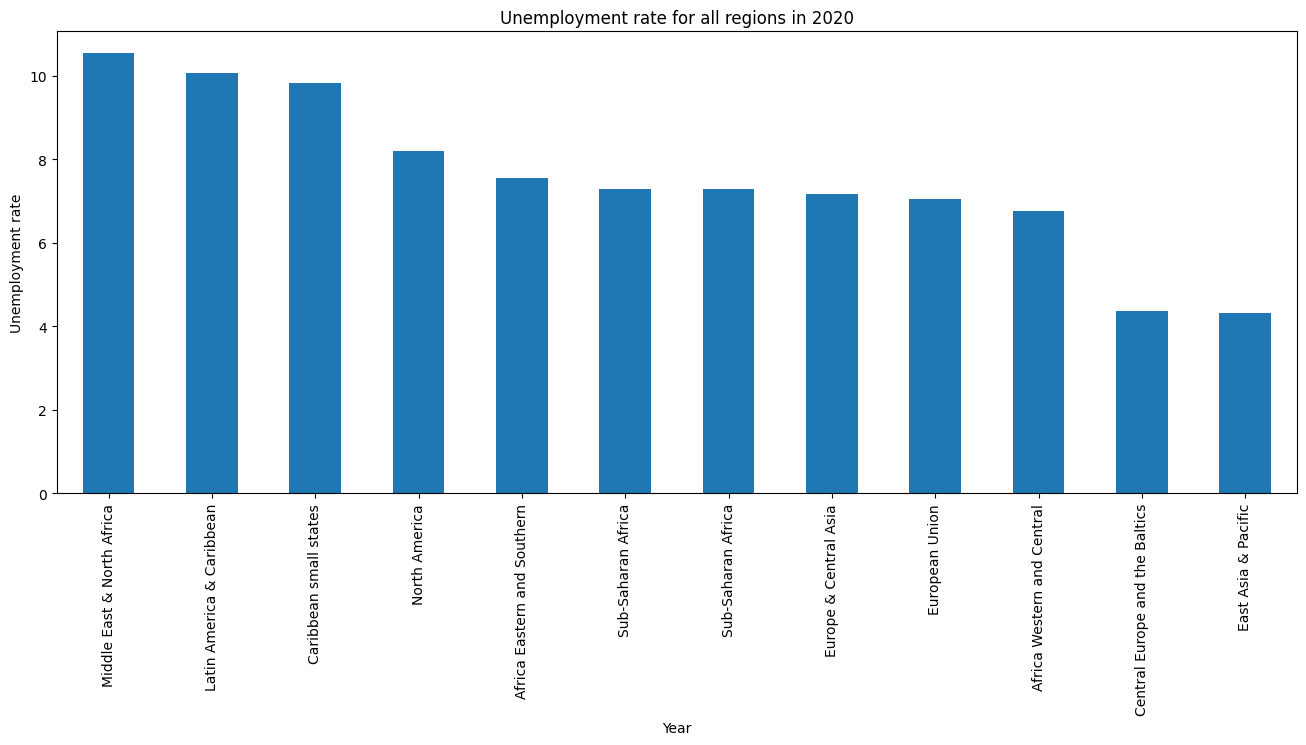

In [18]:
plt.figure(figsize = (16,6));
dfg_20.sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Year');
plt.xticks(rotation='vertical')
plt.ylabel('Unemployment rate');
plt.title('Unemployment rate for all regions in 2020');